 # Machine Learning

### Random Forest and Linear Regression models

#### Jorge de Toro, Juan A. Ortíz


In [1]:
# Importamos todos los módulos necesarios

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#modelos Regresión Lineal y Random Forest
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import adfuller

#medidas de error
from sklearn.metrics import mean_squared_error, confusion_matrix
from math import sqrt

In [2]:
df=pd.DataFrame()
df = pd.read_csv('C:/Users/jorge/El Corte Inglés, S.A/Otb y el master - Documentos/VentaDia.csv',';',
                 index_col='Fecha Venta',parse_dates=True)
#df.index.freq = 'MS'

In [3]:
df.index = pd.to_datetime(df.index)
print(df.head())
df.info()

             Unidades Vendidas
Fecha Venta                   
2018-01-01                 644
2018-01-02                7295
2018-01-03                4751
2018-01-04                6828
2018-01-05                4866
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1096 entries, 2018-01-01 to 2020-12-31
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Unidades Vendidas  1096 non-null   int64
dtypes: int64(1)
memory usage: 17.1 KB


,Sales
Fecha Venta,
2018-01-01,644
2018-01-02,7295
2018-01-03,4751
2018-01-04,6828
2018-01-05,4866
...,...
2020-12-27,3198
2020-12-28,5087
2020-12-29,5097


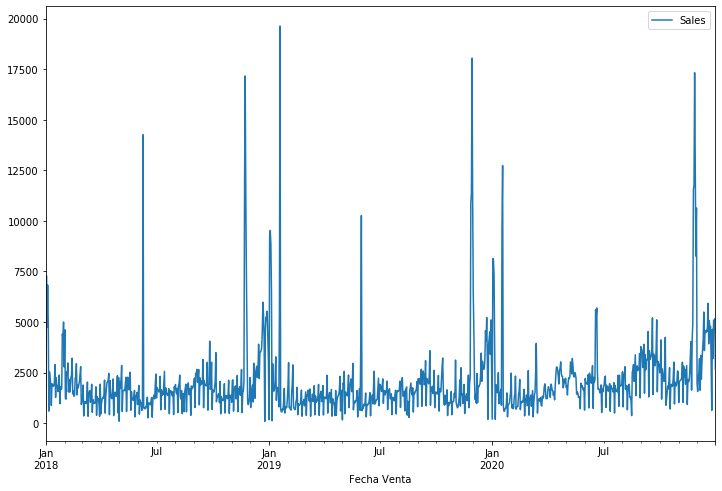

In [4]:
df.columns = ['Sales']
df.plot(figsize=(12,8))
df

In [5]:
#Nos vamos una semana hacia atrás

df['Sale_LastDay']=df['Sales'].shift(+1)
df['Sale_2Daysback']=df['Sales'].shift(+2)
df['Sale_3Daysback']=df['Sales'].shift(+3)
df['Sale_4Daysback']=df['Sales'].shift(+4)
df['Sale_5Daysback']=df['Sales'].shift(+5)
df['Sale_6Daysback']=df['Sales'].shift(+6)
df['Sale_7Daysback']=df['Sales'].shift(+7)
df

,Sales,Sale_LastDay,Sale_2Daysback,Sale_3Daysback,Sale_4Daysback,Sale_5Daysback,Sale_6Daysback,Sale_7Daysback
Fecha Venta,,,,,,,,
2018-01-01,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02,7295,644.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,4751,7295.0,644.0,NaN,NaN,NaN,NaN,NaN
2018-01-04,6828,4751.0,7295.0,644.0,NaN,NaN,NaN,NaN
2018-01-05,4866,6828.0,4751.0,7295.0,644.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2020-12-27,3198,4642.0,632.0,3064.0,4788.0,4630.0,5060.0,3923.0
2020-12-28,5087,3198.0,4642.0,632.0,3064.0,4788.0,4630.0,5060.0
2020-12-29,5097,5087.0,3198.0,4642.0,632.0,3064.0,4788.0,4630.0


In [14]:
#quitamos los NaN
df=df.dropna()
df

,Sales,Sale_LastDay,Sale_2Daysback,Sale_3Daysback,Sale_4Daysback,Sale_5Daysback,Sale_6Daysback,Sale_7Daysback
Fecha Venta,,,,,,,,
2018-01-08,2203,2536.0,596.0,4866.0,6828.0,4751.0,7295.0,644.0
2018-01-09,1943,2203.0,2536.0,596.0,4866.0,6828.0,4751.0,7295.0
2018-01-10,878,1943.0,2203.0,2536.0,596.0,4866.0,6828.0,4751.0
2018-01-11,1946,878.0,1943.0,2203.0,2536.0,596.0,4866.0,6828.0
2018-01-12,1891,1946.0,878.0,1943.0,2203.0,2536.0,596.0,4866.0
...,...,...,...,...,...,...,...,...
2020-12-27,3198,4642.0,632.0,3064.0,4788.0,4630.0,5060.0,3923.0
2020-12-28,5087,3198.0,4642.0,632.0,3064.0,4788.0,4630.0,5060.0
2020-12-29,5097,5087.0,3198.0,4642.0,632.0,3064.0,4788.0,4630.0


In [15]:
#hacemos instancia al modelo de Regresión lineal
lin_model=LinearRegression()

In [16]:
#hacemos instancia al modelo de Random Forest
model = RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)
#model = RandomForestClassifier(n_estimators=40)



In [17]:
#creamos los arrays en nympy y redimensionamos
x1,x2,x3,x4,x5,x6,x7,y=df['Sale_LastDay'],df['Sale_2Daysback'],df['Sale_3Daysback'],df['Sale_4Daysback'],df['Sale_5Daysback'],df['Sale_6Daysback'],df['Sale_7Daysback'],df['Sales']
x1,x2,x3,x4,x5,x6,x7,y=np.array(x1),np.array(x2),np.array(x3),np.array(x4),np.array(x5),np.array(x6),np.array(x7),np.array(y)
x1,x2,x3,x4,x5,x6,x7,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),x4.reshape(-1,1),x5.reshape(-1,1),x6.reshape(-1,1),x7.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3,x4,x5,x6,x7),axis=1)
print(final_x)



[[2536.  596. 4866. ... 4751. 7295.  644.]
 [2203. 2536.  596. ... 6828. 4751. 7295.]
 [1943. 2203. 2536. ... 4866. 6828. 4751.]
 ...
 [5087. 3198. 4642. ... 3064. 4788. 4630.]
 [5097. 5087. 3198. ...  632. 3064. 4788.]
 [5162. 5097. 5087. ... 4642.  632. 3064.]]


In [18]:
#dividimos el conjunto en entrenamiento y test

X_train,X_test,y_train,y_test=final_x[:-30],final_x[-30:],y[:-30],y[-30:]
print(len(X_train))

1059


In [19]:
# model.fit(X_train,y_train)
print (lin_model.fit(X_train,y_train))

print('w = ' + str(lin_model.coef_) + ', b = ' + str(lin_model.intercept_))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
w = [[ 0.52519741  0.082966    0.01544915 -0.03705821  0.02864134 -0.11225528
   0.22237642]], b = [545.93593846]


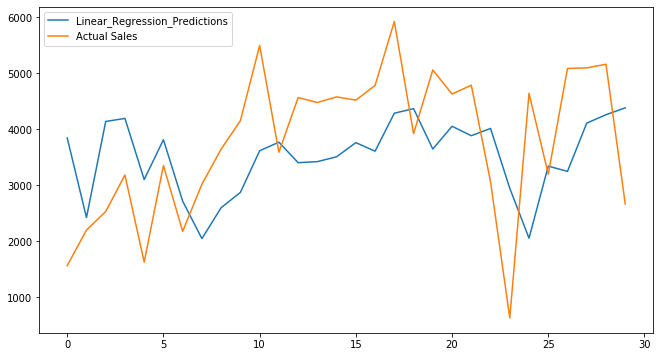

In [20]:
#Regresión lineal predicción

lin_pred=lin_model.predict(X_test)

plt.rcParams["figure.figsize"] = (11,6)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")

plt.show()


In [15]:
#entrenamiento Random Forest

print(model.fit(X_train, y_train))
model.score(X_test, y_test)

<ipython-input-15-05eae3cf5b21>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  print(model.fit(X_train, y_train))


RandomForestRegressor(max_features=3, random_state=1)


0.075616774520196

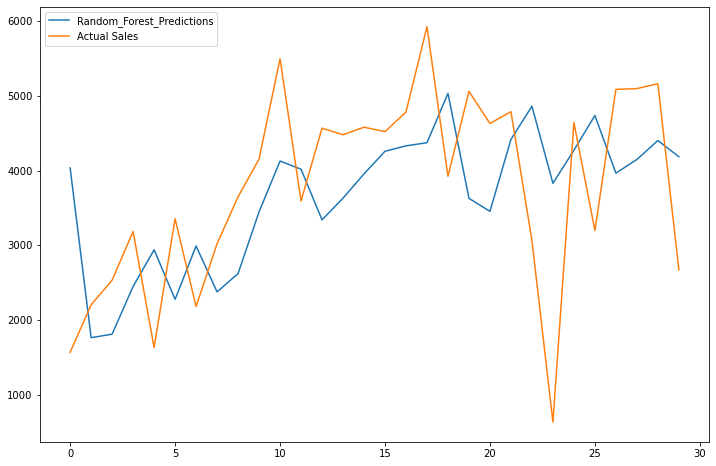

In [16]:
#Random Forest prediction

pred=model.predict(X_test)

plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")

plt.show()



In [17]:
#medidas de error para ver la bondad del modelo

rmse_rf=sqrt(mean_squared_error(pred,y_test))
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))

In [18]:
print('Mean Squared Error for Random Forest Model is:',rmse_rf)
print('Mean Squared Error for Linear Regression Model is:',rmse_lr)

Mean Squared Error for Random Forest Model is: 1238.5696194831628
Mean Squared Error for Linear Regression Model is: 1309.1883869312016


# Modelo ARIMA

In [46]:
# pip install pmdarima
import pandas as pd
import numpy as np
import datetime

import csv

import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
#dependencias para desarrollar ARIMA Forecasting Models

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.api import acf, pacf, graphics
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm
import statsmodels.api as sm

from pandas.plotting import autocorrelation_plot

from sklearn.metrics import mean_squared_error


In [73]:
df = pd.read_csv('C:/Users/jorge/El Corte Inglés, S.A/Otb y el master - Documentos/VentaDia.csv',';',parse_dates=True)

df['Fecha Venta'] = pd.to_datetime(df['Fecha Venta'])
df=df.dropna()

#set date as index column. (required in time series)
df = df.set_index('Fecha Venta')

print('Shape of data',df.shape)
print(df.dtypes)
df.head()

Shape of data (1096, 1)
Unidades Vendidas    int64
dtype: object


,Unidades Vendidas
Fecha Venta,
2018-01-01,644
2018-01-02,7295
2018-01-03,4751
2018-01-04,6828
2018-01-05,4866


<AxesSubplot:xlabel='Fecha Venta'>

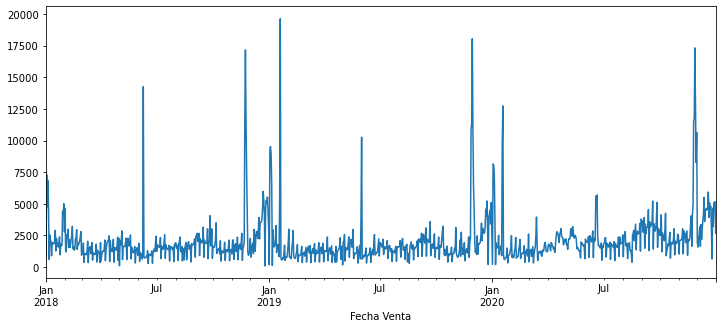

In [49]:
df['Unidades Vendidas'].plot(figsize=(12,5))

#### Chequeamos la estacionalidad

In [55]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF Statistic : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [56]:
adf_test(df['Unidades Vendidas'])

#p-value < 0.05 estacionaria
#p-value > 0.05 no es estacionaria

1. ADF Statistic :  -4.250521962187451
2. P-Value :  0.00054050297357893
3. Num Of Lags :  21
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1074
5. Critical Values :
	 1% :  -3.4364533503600962
	 5% :  -2.864234857527328
	 10% :  -2.568204837482531


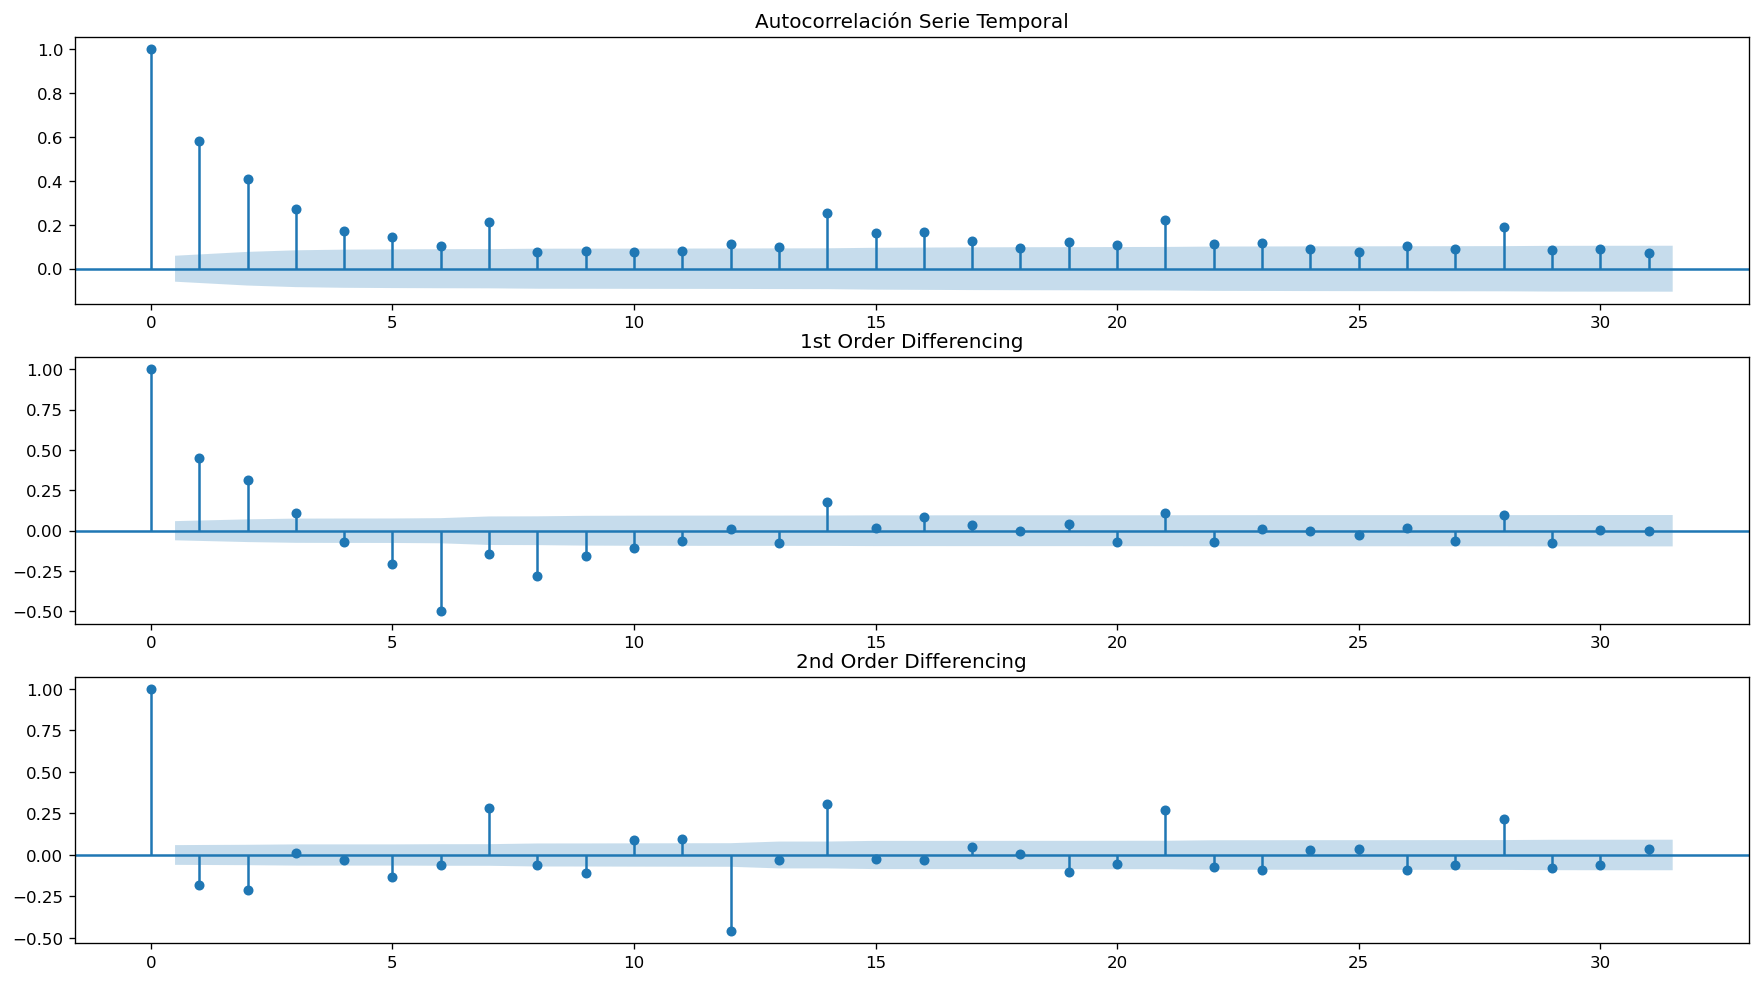

In [78]:
fig = plt.figure(figsize=(18,10))

#serie original
ax1 = fig.add_subplot(311)
fig = plot_acf(df['Unidades Vendidas'], ax=ax1, title="Autocorrelación Serie Temporal")

#1st differencing
ax2 = fig.add_subplot(312)
fig = plot_acf(df['Unidades Vendidas'].diff(6).dropna(), ax=ax2, title="1st Order Differencing")

#2nd Differencing
ax3 = fig.add_subplot(313)
fig = plot_acf(df['Unidades Vendidas'].diff().diff(12).dropna(), ax=ax3, title="2nd Order Differencing")

#### Resolvemos el orden de modelo ARIMA

In [24]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [25]:
stepwise_fit = auto_arima(df['Unidades Vendidas'], 
                          suppress_warnings=True)           

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1096
Model:               SARIMAX(3, 1, 5)   Log Likelihood               -9493.591
Date:                Mon, 10 May 2021   AIC                          19005.182
Time:                        17:43:51   BIC                          19050.168
Sample:                             0   HQIC                         19022.204
                               - 1096                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2164      0.084    -14.457      0.000      -1.381      -1.051
ar.L2          0.0567      0.151      0.375      0.708      -0.240       0.353
ar.L3          0.5832      0.084      6.960      0.000       0.419       0.747
ma.L1          0.8525      0.080     10.611      0.000       0.695       1.010
ma.L2         -0.7970      0.121     -6.568      0.000      -1.035      -0.559
ma.L3         -1.0233      0.026    -39.418      0.000      -1.074      -0.972
ma.L4          0.0072      0.111      0.065      0.948      -0.210       0.225
ma.L5          0.0607      0.051      1.196      0.232      -0.039       0.160
sigma2      2.205e+06    2.9e+04     76.090      0.000    2.15e+06    2.26e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             58698.07
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                             3.04
Prob(H) (two-sided):                  0.46   Kurtosis:                        38.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.54e+14. Standard errors may be unstable.
"""

#### Vemos que nuestro modelo tiene orden (3,1,5)

In [26]:
from statsmodels.tsa.arima_model import ARIMA

#### Creamos conjunto de test y train

In [27]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(1096, 1)
(1066, 1) (30, 1)
Unidades Vendidas    1567
Name: 2020-12-02 00:00:00, dtype: int64 Unidades Vendidas    2669
Name: 2020-12-31 00:00:00, dtype: int64


## Entrenamos el modelo

In [28]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['Unidades Vendidas'],order=(3,1,5))
model=model.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARIMA Model Results                              
===============================================================================
Dep. Variable:     D.Unidades Vendidas   No. Observations:                 1065
Model:                  ARIMA(3, 1, 5)   Log Likelihood               -9237.281
Method:                        css-mle   S.D. of innovations           1411.588
Date:                 Mon, 10 May 2021   AIC                          18494.561
Time:                         17:43:54   BIC                          18544.269
Sample:                     01-02-2018   HQIC                         18513.396
                          - 12-01-2020                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         1.5906      2.937      0.542      0.588      -4.167       7.348
ar.L1.D.Unidades Vendidas    -1.2059      0.090    -13.339      0.000      -1.383      -1.029
ar.L2.D.Unidades Vendidas     0.0753      0.163      0.463      0.643      -0.243       0.394
ar.L3.D.Unidades Vendidas     0.5924      0.090      6.583      0.000       0.416       0.769
ma.L1.D.Unidades Vendidas     0.8381      0.095      8.792      0.000       0.651       1.025
ma.L2.D.Unidades Vendidas    -0.8072      0.133     -6.078      0.000      -1.068      -0.547
ma.L3.D.Unidades Vendidas    -1.0112      0.042    -24.195      0.000      -1.093      -0.929
ma.L4.D.Unidades Vendidas     0.0178      0.119      0.149      0.882      -0.216       0.252
ma.L5.D.Unidades Vendidas     0.0628      0.055      1.142      0.254      -0.045       0.171
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9041           -0.4321j            1.0021           -0.4290
AR.2           -0.9041           +0.4321j            1.0021            0.4290
AR.3            1.6811           -0.0000j            1.6811           -0.0000
MA.1           -0.9284           -0.4302j            1.0232           -0.4309
MA.2           -0.9284           +0.4302j            1.0232            0.4309
MA.3            1.0286           -0.0000j            1.0286           -0.0000
MA.4           -3.5823           -0.0000j            3.5823           -0.5000
MA.5            4.1270           -0.0000j            4.1270           -0.0000
-----------------------------------------------------------------------------
"""

#### Hacemos las predicciones sobre el conjunto test

<AxesSubplot:xlabel='Fecha Venta'>

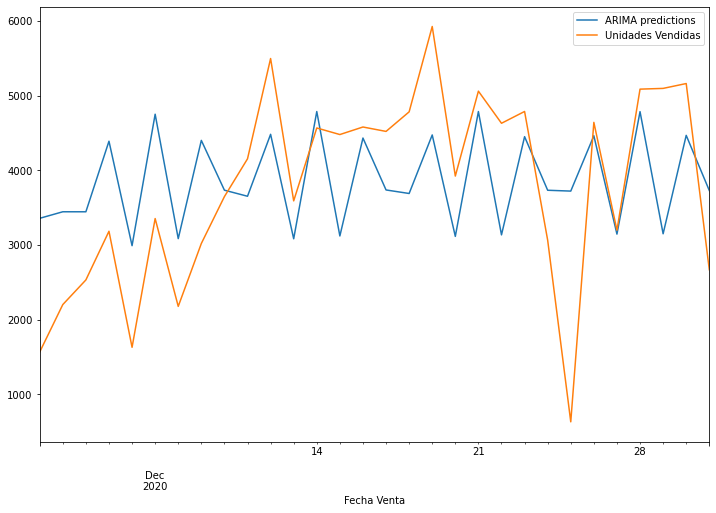

In [29]:
start=len(train)
end=len(train)+len(test)-1
#index_future_dates=pd.date_range(start='2018-01-01',end='2020-12-31')
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
#pred.index=index_future_dates
pred.plot(legend=True)
test['Unidades Vendidas'].plot(legend=True)

<AxesSubplot:xlabel='Fecha Venta'>

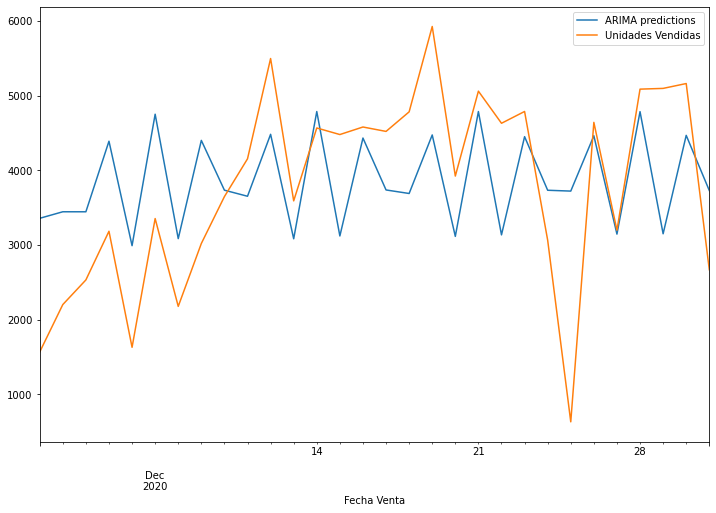

In [30]:
pred.plot(legend='ARIMA Predictions')
test['Unidades Vendidas'].plot(legend=True)

In [31]:
test['Unidades Vendidas'].mean()

3778.8333333333335

In [32]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['Unidades Vendidas']))
print(rmse)

1148.0466716574438


In [33]:
model2=ARIMA(df['Unidades Vendidas'],order=(3,1,5))
model2=model2.fit()
df.tail()

,Unidades Vendidas
Fecha Venta,
2020-12-27,3198
2020-12-28,5087
2020-12-29,5097
2020-12-30,5162
2020-12-31,2669


#### Para datos futuros

In [34]:
index_future_dates=pd.date_range(start='2020-12-31',end='2021-01-30')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2020-12-31    2804.087975
2021-01-01    4059.339852
2021-01-02    2982.653480
2021-01-03    4430.302903
2021-01-04    3239.714529
2021-01-05    4146.354529
2021-01-06    3823.211221
2021-01-07    3577.089464
2021-01-08    4388.867233
2021-01-09    3202.415163
2021-01-10    4550.130784
2021-01-11    3319.669563
2021-01-12    4203.509838
2021-01-13    3846.629841
2021-01-14    3616.424391
2021-01-15    4393.314724
2021-01-16    3230.327828
2021-01-17    4556.687381
2021-01-18    3333.130359
2021-01-19    4220.991198
2021-01-20    3847.151285
2021-01-21    3641.800146
2021-01-22    4389.844653
2021-01-23    3253.453979
2021-01-24    4560.316030
2021-01-25    3345.168912
2021-01-26    4237.189381
2021-01-27    3847.412324
2021-01-28    3666.571036
2021-01-29    4386.335834
2021-01-30    3276.434201
Freq: D, Name: ARIMA Predictions, dtype: float64


<AxesSubplot:>

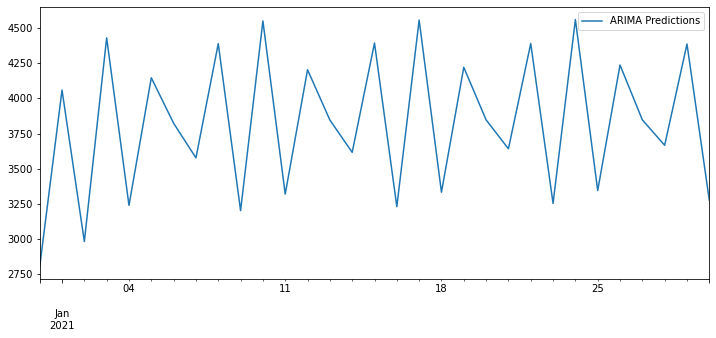

In [35]:
pred.plot(figsize=(12,5),legend=True)